In [0]:
!cp '/content/drive/My Drive/ml competition/av bain and co, women in data science/train.csv' '/content/'
!cp '/content/drive/My Drive/ml competition/av bain and co, women in data science/test.csv' '/content/'
!cp '/content/drive/My Drive/ml competition/av bain and co, women in data science/sample_submission.csv' '/content/'

## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

train.columns = train.columns.str.strip().str.lower()
test.columns = test.columns.str.strip().str.lower()


In [596]:
train.isnull().sum()

id                       0
day_no                   0
course_id                0
course_domain            0
course_type              0
short_promotion          0
public_holiday           0
long_promotion           0
user_traffic             0
competition_metric    1764
sales                    0
dtype: int64

In [597]:
train.groupby('course_id')['day_no'].mean().unique()

array([441.5       , 389.56876791, 442.        ])

In [0]:
val = train.groupby('course_id')['day_no'].mean()

In [599]:
train.columns

Index(['id', 'day_no', 'course_id', 'course_domain', 'course_type',
       'short_promotion', 'public_holiday', 'long_promotion', 'user_traffic',
       'competition_metric', 'sales'],
      dtype='object')

In [600]:
train.id.duplicated().sum()

0

In [0]:
competition_metric = train.groupby(['course_domain','course_type'])['competition_metric'].mean().to_dict()

In [602]:
competition_metric

{('Business', 'Course'): 0.013666666666666454,
 ('Business', 'Degree'): 0.010000000000000136,
 ('Development', 'Course'): 0.052933328275301623,
 ('Development', 'Program'): 0.09312794299291868,
 ('Finance & Accounting', 'Course'): 0.032836681659178565,
 ('Finance & Accounting', 'Program'): 0.05452600161334461,
 ('Software Marketing', 'Course'): 0.09850878170259637,
 ('Software Marketing', 'Program'): 0.09445713353921102}

In [0]:
competition_metric = train.groupby(['course_domain','course_type'])['competition_metric'].median().to_dict()

In [604]:
competition_metric

{('Business', 'Course'): 0.016,
 ('Business', 'Degree'): 0.01,
 ('Development', 'Course'): 0.021,
 ('Development', 'Program'): 0.034,
 ('Finance & Accounting', 'Course'): 0.022,
 ('Finance & Accounting', 'Program'): 0.033,
 ('Software Marketing', 'Course'): 0.067,
 ('Software Marketing', 'Program'): 0.077}

In [605]:
train.columns

Index(['id', 'day_no', 'course_id', 'course_domain', 'course_type',
       'short_promotion', 'public_holiday', 'long_promotion', 'user_traffic',
       'competition_metric', 'sales'],
      dtype='object')

In [0]:
train.loc[train['course_id']==176,'competition_metric'] = 0.067
train.loc[train['course_id']==354,'competition_metric'] = 0.034

In [0]:
test.loc[test['course_id']==176,'competition_metric'] = 0.067
test.loc[test['course_id']==354,'competition_metric'] = 0.034

In [608]:
train.dtypes

id                      int64
day_no                  int64
course_id               int64
course_domain          object
course_type            object
short_promotion         int64
public_holiday          int64
long_promotion          int64
user_traffic            int64
competition_metric    float64
sales                   int64
dtype: object

In [609]:
train.isnull().sum()

id                    0
day_no                0
course_id             0
course_domain         0
course_type           0
short_promotion       0
public_holiday        0
long_promotion        0
user_traffic          0
competition_metric    0
sales                 0
dtype: int64

In [610]:
train['label'] = 'Train'
test['label'] = 'Test'
'''train.set_index('id',inplace=True)
test.set_index('id',inplace=True)
train_index = train.index
test_index = test.index'''

"train.set_index('id',inplace=True)\ntest.set_index('id',inplace=True)\ntrain_index = train.index\ntest_index = test.index"

In [0]:
temp = train.append(test,verify_integrity=True,ignore_index=True,sort=True)
temp.sort_values(by=['course_id','day_no'],inplace=True)

In [612]:
temp['label'].value_counts()

Train    512087
Test      36000
Name: label, dtype: int64

In [0]:
temp.sort_values(by=['course_id','day_no'],inplace=True)

In [0]:
temp['sales_lag'] = temp.groupby('course_id')['sales'].shift(60)
temp['user_traffic_lag'] = temp.groupby('course_id')['user_traffic'].shift(60)

In [615]:
temp.isnull().sum()

competition_metric        0
course_domain             0
course_id                 0
course_type               0
day_no                    0
id                        0
label                     0
long_promotion            0
public_holiday            0
sales                 36000
short_promotion           0
user_traffic          36000
sales_lag             36000
user_traffic_lag      36000
dtype: int64

In [616]:
temp[(temp['day_no']>880)&(temp['course_id']==1)]

,competition_metric,course_domain,course_id,course_type,day_no,id,label,long_promotion,public_holiday,sales,short_promotion,user_traffic,sales_lag,user_traffic_lag
880,0.007,Development,1,Course,881,881,Train,1,0,60.0,0,10773.0,116.0,15876.0
881,0.007,Development,1,Course,882,882,Train,1,0,120.0,1,14133.0,111.0,12999.0
512087,0.007,Development,1,Course,883,883,Test,1,0,NaN,1,NaN,62.0,8820.0
512088,0.007,Development,1,Course,884,884,Test,1,0,NaN,1,NaN,80.0,10626.0
512089,0.007,Development,1,Course,885,885,Test,1,0,NaN,1,NaN,82.0,11193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512142,0.007,Development,1,Course,938,938,Test,1,0,NaN,1,NaN,73.0,10878.0
512143,0.007,Development,1,Course,939,939,Test,1,0,NaN,1,NaN,81.0,12096.0
512144,0.007,Development,1,Course,940,940,Test,1,0,NaN,1,NaN,61.0,10773.0
512145,0.007,Development,1,Course,941,941,Test,1,0,NaN,1,NaN,60.0,10773.0


In [617]:
temp

,competition_metric,course_domain,course_id,course_type,day_no,id,label,long_promotion,public_holiday,sales,short_promotion,user_traffic,sales_lag,user_traffic_lag
0,0.007,Development,1,Course,1,1,Train,1,1,81.0,0,11004.0,NaN,NaN
1,0.007,Development,1,Course,2,2,Train,1,0,79.0,0,13650.0,NaN,NaN
2,0.007,Development,1,Course,3,3,Train,1,0,75.0,0,11655.0,NaN,NaN
3,0.007,Development,1,Course,4,4,Train,1,0,80.0,0,12054.0,NaN,NaN
4,0.007,Development,1,Course,5,5,Train,1,0,41.0,0,6804.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548082,0.070,Software Marketing,600,Program,938,548083,Test,1,0,NaN,1,NaN,114.0,8904.0
548083,0.070,Software Marketing,600,Program,939,548084,Test,1,0,NaN,1,NaN,145.0,10542.0
548084,0.070,Software Marketing,600,Program,940,548085,Test,1,0,NaN,1,NaN,167.0,13671.0
548085,0.070,Software Marketing,600,Program,941,548086,Test,1,0,NaN,1,NaN,107.0,8904.0


In [0]:
train = temp.loc[temp['label']=='Train'].copy()
test = temp.loc[temp['label']=='Test'].copy()
del train['label'],test['label']

In [619]:
train.columns

Index(['competition_metric', 'course_domain', 'course_id', 'course_type',
       'day_no', 'id', 'long_promotion', 'public_holiday', 'sales',
       'short_promotion', 'user_traffic', 'sales_lag', 'user_traffic_lag'],
      dtype='object')

In [620]:
train.corr()

,competition_metric,course_id,day_no,id,long_promotion,public_holiday,sales,short_promotion,user_traffic,sales_lag,user_traffic_lag
competition_metric,1.000000,-0.007512,0.003202,-0.007560,-0.118398,-0.000475,-0.021510,0.000181,-0.148054,-0.021294,-0.148197
course_id,-0.007512,1.000000,-0.000506,0.999996,-0.039605,0.001242,0.016894,-0.000027,0.033520,0.017733,0.034009
day_no,0.003202,-0.000506,1.000000,0.001052,-0.020204,0.019112,0.060012,0.014645,0.021511,0.056630,0.020713
id,-0.007560,0.999996,0.001052,1.000000,-0.039570,0.001274,0.017037,-0.000005,0.033604,0.017864,0.034091
long_promotion,-0.118398,-0.039605,-0.020204,-0.039570,1.000000,0.008319,-0.109455,-0.001149,-0.204289,-0.109908,-0.203859
public_holiday,-0.000475,0.001242,0.019112,0.001274,0.008319,1.000000,-0.135052,-0.018770,-0.108305,0.001781,0.000425
sales,-0.021510,0.016894,0.060012,0.017037,-0.109455,-0.135052,1.000000,0.367762,0.829741,0.579030,0.557155
short_promotion,0.000181,-0.000027,0.014645,-0.000005,-0.001149,-0.018770,0.367762,1.000000,0.198785,0.015341,0.014483
user_traffic,-0.148054,0.033520,0.021511,0.033604,-0.204289,-0.108305,0.829741,0.198785,1.000000,0.555211,0.789069
sales_lag,-0.021294,0.017733,0.056630,0.017864,-0.109908,0.001781,0.579030,0.015341,0.555211,1.000000,0.830484


In [621]:
train.isnull().sum()

competition_metric        0
course_domain             0
course_id                 0
course_type               0
day_no                    0
id                        0
long_promotion            0
public_holiday            0
sales                     0
short_promotion           0
user_traffic              0
sales_lag             36000
user_traffic_lag      36000
dtype: int64

In [622]:
test.isnull().sum()

competition_metric        0
course_domain             0
course_id                 0
course_type               0
day_no                    0
id                        0
long_promotion            0
public_holiday            0
sales                 36000
short_promotion           0
user_traffic          36000
sales_lag                 0
user_traffic_lag          0
dtype: int64

In [623]:
train.shape

(512087, 13)

In [0]:
train = train.dropna()

In [625]:
train.shape

(476087, 13)

In [626]:
train.isnull().sum()

competition_metric    0
course_domain         0
course_id             0
course_type           0
day_no                0
id                    0
long_promotion        0
public_holiday        0
sales                 0
short_promotion       0
user_traffic          0
sales_lag             0
user_traffic_lag      0
dtype: int64

In [627]:
train['day_no'].min()

61

In [628]:
np.percentile(train['day_no'].unique(),q=75)

676.75

In [0]:
train['label'] = 'Train'
test['label'] = 'Test'
temp = train.append(test,verify_integrity=True,ignore_index=True,sort=True)
temp.sort_values(by=['course_id','day_no'],inplace=True)

In [630]:
temp.head()

,competition_metric,course_domain,course_id,course_type,day_no,id,label,long_promotion,public_holiday,sales,sales_lag,short_promotion,user_traffic,user_traffic_lag
0,0.007,Development,1,Course,61,61,Train,1,0,47.0,81.0,0,7413.0,11004.0
1,0.007,Development,1,Course,62,62,Train,1,0,55.0,79.0,0,9303.0,13650.0
2,0.007,Development,1,Course,63,63,Train,1,0,144.0,75.0,1,16590.0,11655.0
3,0.007,Development,1,Course,64,64,Train,1,0,114.0,80.0,1,13860.0,12054.0
4,0.007,Development,1,Course,65,65,Train,1,0,123.0,41.0,1,16926.0,6804.0


In [0]:
course_domain_type_sales_mean = temp.groupby(['course_domain','course_type','day_no'])['sales_lag'].mean().reset_index()
course_domain_type_sales_median = temp.groupby(['course_domain','course_type','day_no'])['sales_lag'].median().reset_index()

course_domain_type_traffic_mean = temp.groupby(['course_domain','course_type','day_no'])['user_traffic_lag'].mean().reset_index()
course_domain_type_traffic_median = temp.groupby(['course_domain','course_type','day_no'])['user_traffic_lag'].median().reset_index()

In [0]:
course_domain_type_sales_mean.rename(columns={'sales_lag':'course_domain_type_sales_mean'},inplace=True)
course_domain_type_sales_median.rename(columns={'sales_lag':'course_domain_type_sales_median'},inplace=True)

course_domain_type_traffic_mean.rename(columns={'user_traffic_lag':'course_domain_type_traffic_mean'},inplace=True)
course_domain_type_traffic_median.rename(columns={'user_traffic_lag':'course_domain_type_traffic_median'},inplace=True)

In [0]:
temp = pd.merge(left=temp, right=course_domain_type_sales_mean,how='left',on=['course_domain','course_type','day_no'])
temp = pd.merge(left=temp, right=course_domain_type_sales_median,how='left',on=['course_domain','course_type','day_no'])
temp = pd.merge(left=temp, right=course_domain_type_traffic_mean,how='left',on=['course_domain','course_type','day_no'])
temp = pd.merge(left=temp, right=course_domain_type_traffic_median,how='left',on=['course_domain','course_type','day_no'])

In [0]:
temp.sort_values(by=['course_id','day_no'],inplace=True)
temp['user_traffic_ewm1'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.ewm(span=10).mean())
temp['user_traffic_ewm2'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['user_traffic_ewm3'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.ewm(span=30).mean())
temp['user_traffic_ewm4'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['user_traffic_ewm5'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.ewm(span=60).mean())
temp['user_traffic_ewm6'] = temp.groupby(['course_id'])['user_traffic_lag'].transform(lambda x: x.rolling(60,min_periods=1).median())

temp['sales_ewm1'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.ewm(span=10).mean())
temp['sales_ewm2'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['sales_ewm3'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.ewm(span=30).mean())
temp['sales_ewm4'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['sales_ewm5'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.ewm(span=60).mean())
temp['sales_ewm6'] = temp.groupby(['course_id'])['sales_lag'].transform(lambda x: x.rolling(60,min_periods=1).median())

temp['sp_ewm1'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.ewm(span=10).mean())
temp['sp_ewm2'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.rolling(10,min_periods=1).mean())
temp['sp_ewm3'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.ewm(span=30).mean())
temp['sp_ewm4'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.rolling(30,min_periods=1).mean())
temp['sp_ewm5'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.ewm(span=40).mean())
temp['sp_ewm6'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.rolling(40,min_periods=1).mean())
temp['sp_ewm7'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.ewm(span=50).mean())
temp['sp_ewm8'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.rolling(50,min_periods=1).mean())
temp['sp_ewm9'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.ewm(span=60).mean())
temp['sp_ewm10'] = temp.groupby(['course_id'])['short_promotion'].transform(lambda x: x.rolling(60,min_periods=1).mean())

temp['sales_mean_ewm1'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.ewm(span=10).mean())
temp['sales_mean_ewm2'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['sales_mean_ewm3'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.ewm(span=30).mean())
temp['sales_mean_ewm4'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['sales_mean_ewm5'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.ewm(span=60).mean())
temp['sales_mean_ewm6'] = temp.groupby(['course_id'])['course_domain_type_sales_mean'].transform(lambda x: x.rolling(60,min_periods=1).median())

temp['sales_median_ewm1'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.ewm(span=10).mean())
temp['sales_median_ewm2'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['sales_median_ewm3'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.ewm(span=30).mean())
temp['sales_median_ewm4'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['sales_median_ewm5'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.ewm(span=60).mean())
temp['sales_median_ewm6'] = temp.groupby(['course_id'])['course_domain_type_sales_median'].transform(lambda x: x.rolling(60,min_periods=1).median())

temp['traffic_mean_ewm1'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.ewm(span=10).mean())
temp['traffic_mean_ewm2'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['traffic_mean_ewm3'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.ewm(span=30).mean())
temp['traffic_mean_ewm4'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['traffic_mean_ewm5'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.ewm(span=60).mean())
temp['traffic_mean_ewm6'] = temp.groupby(['course_id'])['course_domain_type_traffic_mean'].transform(lambda x: x.rolling(60,min_periods=1).median())

temp['traffic_median_ewm1'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.ewm(span=10).mean())
temp['traffic_median_ewm2'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.rolling(10,min_periods=1).median())
temp['traffic_median_ewm3'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.ewm(span=30).mean())
temp['traffic_median_ewm4'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.rolling(30,min_periods=1).median())
temp['traffic_median_ewm5'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.ewm(span=60).mean())
temp['traffic_median_ewm6'] = temp.groupby(['course_id'])['course_domain_type_traffic_median'].transform(lambda x: x.rolling(60,min_periods=1).median())


In [0]:
train = temp.loc[temp['label']=='Train'].copy()
test = temp.loc[temp['label']=='Test'].copy()
del train['label'],test['label']

In [636]:
train.isnull().sum()

competition_metric     0
course_domain          0
course_id              0
course_type            0
day_no                 0
                      ..
traffic_median_ewm2    0
traffic_median_ewm3    0
traffic_median_ewm4    0
traffic_median_ewm5    0
traffic_median_ewm6    0
Length: 63, dtype: int64

In [637]:
test.isnull().sum()

competition_metric     0
course_domain          0
course_id              0
course_type            0
day_no                 0
                      ..
traffic_median_ewm2    0
traffic_median_ewm3    0
traffic_median_ewm4    0
traffic_median_ewm5    0
traffic_median_ewm6    0
Length: 63, dtype: int64

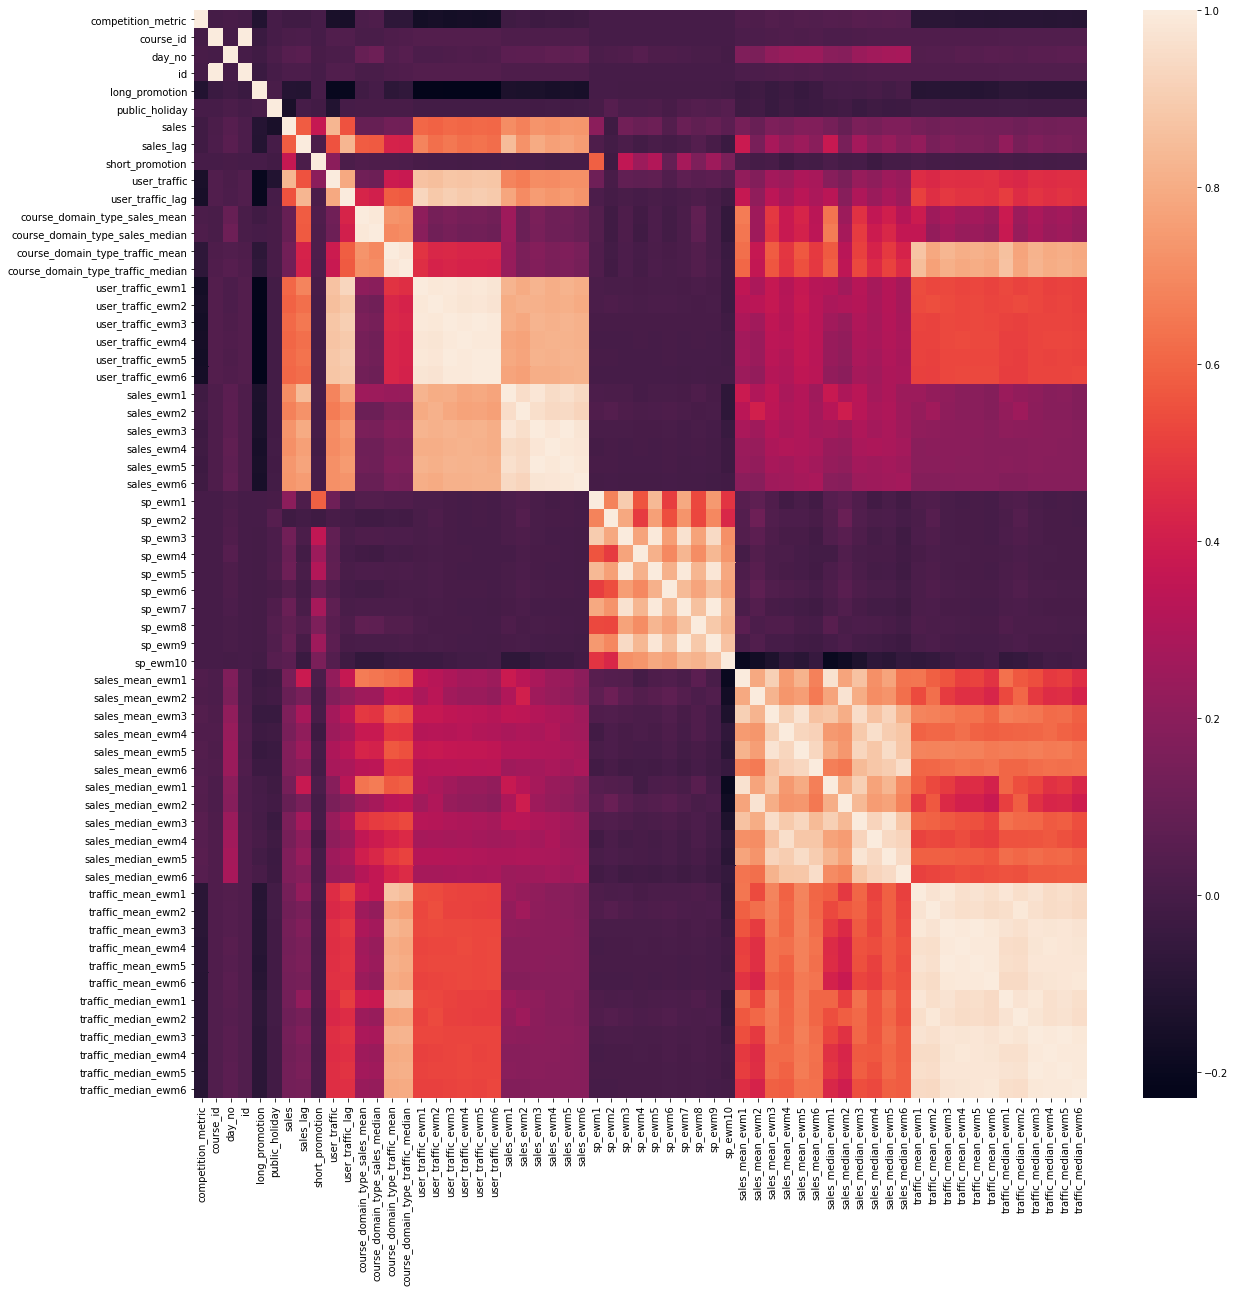

In [638]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr())

In [639]:
!pip install shap

In [640]:
!pip install catboost

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
train.sort_values(by='id',inplace=True)
test.sort_values(by='id',inplace=True)

In [643]:
train.columns

Index(['competition_metric', 'course_domain', 'course_id', 'course_type',
       'day_no', 'id', 'long_promotion', 'public_holiday', 'sales',
       'sales_lag', 'short_promotion', 'user_traffic', 'user_traffic_lag',
       'course_domain_type_sales_mean', 'course_domain_type_sales_median',
       'course_domain_type_traffic_mean', 'course_domain_type_traffic_median',
       'user_traffic_ewm1', 'user_traffic_ewm2', 'user_traffic_ewm3',
       'user_traffic_ewm4', 'user_traffic_ewm5', 'user_traffic_ewm6',
       'sales_ewm1', 'sales_ewm2', 'sales_ewm3', 'sales_ewm4', 'sales_ewm5',
       'sales_ewm6', 'sp_ewm1', 'sp_ewm2', 'sp_ewm3', 'sp_ewm4', 'sp_ewm5',
       'sp_ewm6', 'sp_ewm7', 'sp_ewm8', 'sp_ewm9', 'sp_ewm10',
       'sales_mean_ewm1', 'sales_mean_ewm2', 'sales_mean_ewm3',
       'sales_mean_ewm4', 'sales_mean_ewm5', 'sales_mean_ewm6',
       'sales_median_ewm1', 'sales_median_ewm2', 'sales_median_ewm3',
       'sales_median_ewm4', 'sales_median_ewm5', 'sales_median_ewm6',
     

In [644]:
train.columns

Index(['competition_metric', 'course_domain', 'course_id', 'course_type',
       'day_no', 'id', 'long_promotion', 'public_holiday', 'sales',
       'sales_lag', 'short_promotion', 'user_traffic', 'user_traffic_lag',
       'course_domain_type_sales_mean', 'course_domain_type_sales_median',
       'course_domain_type_traffic_mean', 'course_domain_type_traffic_median',
       'user_traffic_ewm1', 'user_traffic_ewm2', 'user_traffic_ewm3',
       'user_traffic_ewm4', 'user_traffic_ewm5', 'user_traffic_ewm6',
       'sales_ewm1', 'sales_ewm2', 'sales_ewm3', 'sales_ewm4', 'sales_ewm5',
       'sales_ewm6', 'sp_ewm1', 'sp_ewm2', 'sp_ewm3', 'sp_ewm4', 'sp_ewm5',
       'sp_ewm6', 'sp_ewm7', 'sp_ewm8', 'sp_ewm9', 'sp_ewm10',
       'sales_mean_ewm1', 'sales_mean_ewm2', 'sales_mean_ewm3',
       'sales_mean_ewm4', 'sales_mean_ewm5', 'sales_mean_ewm6',
       'sales_median_ewm1', 'sales_median_ewm2', 'sales_median_ewm3',
       'sales_median_ewm4', 'sales_median_ewm5', 'sales_median_ewm6',
     

In [0]:
y = np.log1p(train['sales'])
X = train.drop(['day_no', 'id','sales','user_traffic',],axis=1)

In [0]:
X_train,X_test, y_train,y_test = X.loc[train['day_no']<=675],X.loc[train['day_no']>675],y.loc[train['day_no']<=675],y.loc[train['day_no']>675]

In [0]:
def rmsle(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y

    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [0]:
from sklearn.model_selection import KFold
from catboost import Pool, CatBoostRegressor
import shap

In [649]:
X.columns

Index(['competition_metric', 'course_domain', 'course_id', 'course_type',
       'long_promotion', 'public_holiday', 'sales_lag', 'short_promotion',
       'user_traffic_lag', 'course_domain_type_sales_mean',
       'course_domain_type_sales_median', 'course_domain_type_traffic_mean',
       'course_domain_type_traffic_median', 'user_traffic_ewm1',
       'user_traffic_ewm2', 'user_traffic_ewm3', 'user_traffic_ewm4',
       'user_traffic_ewm5', 'user_traffic_ewm6', 'sales_ewm1', 'sales_ewm2',
       'sales_ewm3', 'sales_ewm4', 'sales_ewm5', 'sales_ewm6', 'sp_ewm1',
       'sp_ewm2', 'sp_ewm3', 'sp_ewm4', 'sp_ewm5', 'sp_ewm6', 'sp_ewm7',
       'sp_ewm8', 'sp_ewm9', 'sp_ewm10', 'sales_mean_ewm1', 'sales_mean_ewm2',
       'sales_mean_ewm3', 'sales_mean_ewm4', 'sales_mean_ewm5',
       'sales_mean_ewm6', 'sales_median_ewm1', 'sales_median_ewm2',
       'sales_median_ewm3', 'sales_median_ewm4', 'sales_median_ewm5',
       'sales_median_ewm6', 'traffic_mean_ewm1', 'traffic_mean_ewm2',
    

In [650]:
X.head()

,competition_metric,course_domain,course_id,course_type,long_promotion,public_holiday,sales_lag,short_promotion,user_traffic_lag,course_domain_type_sales_mean,course_domain_type_sales_median,course_domain_type_traffic_mean,course_domain_type_traffic_median,user_traffic_ewm1,user_traffic_ewm2,user_traffic_ewm3,user_traffic_ewm4,user_traffic_ewm5,user_traffic_ewm6,sales_ewm1,sales_ewm2,sales_ewm3,sales_ewm4,sales_ewm5,sales_ewm6,sp_ewm1,sp_ewm2,sp_ewm3,sp_ewm4,sp_ewm5,sp_ewm6,sp_ewm7,sp_ewm8,sp_ewm9,sp_ewm10,sales_mean_ewm1,sales_mean_ewm2,sales_mean_ewm3,sales_mean_ewm4,sales_mean_ewm5,sales_mean_ewm6,sales_median_ewm1,sales_median_ewm2,sales_median_ewm3,sales_median_ewm4,sales_median_ewm5,sales_median_ewm6,traffic_mean_ewm1,traffic_mean_ewm2,traffic_mean_ewm3,traffic_mean_ewm4,traffic_mean_ewm5,traffic_mean_ewm6,traffic_median_ewm1,traffic_median_ewm2,traffic_median_ewm3,traffic_median_ewm4,traffic_median_ewm5,traffic_median_ewm6
0,0.007,Development,1,Course,1,0,81.0,0,11004.0,130.821622,124.0,15600.616216,14091.0,11004.000000,11004.0,11004.000000,11004.0,11004.000000,11004.0,81.000000,81.0,81.000000,81.0,81.000000,81.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.821622,130.821622,130.821622,130.821622,130.821622,130.821622,124.000000,124.00,124.000000,124.00,124.000000,124.00,15600.616216,15600.616216,15600.616216,15600.616216,15600.616216,15600.616216,14091.000000,14091.0,14091.000000,14091.0,14091.000000,14091.0
1,0.007,Development,1,Course,1,0,79.0,0,13650.0,109.284946,97.0,15991.725806,14070.0,12459.300000,12327.0,12371.100000,12327.0,12349.050000,12327.0,79.900000,80.0,79.966667,80.0,79.983333,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,118.976450,120.053284,119.694339,120.053284,119.873812,120.053284,109.150000,110.50,110.050000,110.50,110.275000,110.50,15815.726491,15796.171011,15802.689505,15796.171011,15799.430258,15796.171011,14079.450000,14080.5,14080.150000,14080.5,14080.325000,14080.5
2,0.007,Development,1,Course,1,0,75.0,1,11655.0,98.978495,89.5,14394.370968,13251.0,12135.976744,11655.0,12116.315809,11655.0,12109.946209,11655.0,77.930233,79.0,78.199556,79.0,78.266549,79.0,0.401993,0.333333,0.355794,0.333333,0.350135,0.333333,0.346754,0.333333,0.344505,0.333333,110.937405,109.284946,112.323763,109.284946,112.675268,109.284946,101.250831,97.00,102.738430,97.00,103.117906,97.00,15244.351015,15600.616216,15301.618007,15600.616216,15315.380113,15600.616216,13746.418605,14070.0,13785.143280,14070.0,13794.618276,14070.0
3,0.007,Development,1,Course,1,0,80.0,1,12054.0,99.897849,91.5,14458.612903,12978.0,12108.969059,11854.5,12099.145533,11854.5,12095.252690,11854.5,78.612129,79.5,78.695644,79.5,78.721817,79.5,0.599010,0.500000,0.533296,0.500000,0.524984,0.500000,0.519992,0.500000,0.516662,0.500000,107.300363,104.591398,108.899971,104.591398,109.319451,104.591398,98.038366,94.25,99.641833,94.25,100.066619,94.25,14985.485315,15029.614560,15069.339381,15029.614560,15090.361741,15029.614560,13493.258911,13660.5,13562.745893,13660.5,13580.144481,13660.5
4,0.007,Development,1,Course,1,0,41.0,1,6804.0,80.080645,69.5,11408.758065,9282.0,10586.056724,11655.0,10894.371723,11655.0,10965.296457,11655.0,67.814710,79.0,70.118972,79.0,70.666257,79.0,0.714123,0.600000,0.639483,0.600000,0.629719,0.600000,0.623824,0.600000,0.619880,0.600000,99.486322,99.897849,102.342877,99.897849,103.075453,99.897849,89.845778,91.50,92.783836,91.50,93.539064,91.50,13958.704200,14458.612903,14236.468505,14458.612903,14304.148860,14458.612903,12284.321013,13251.0,12588.772562,13251.0,12662.268237,13251.0


In [0]:
cat_features = ['course_domain', 'course_id', 'course_type','long_promotion','public_holiday','short_promotion']
model = CatBoostRegressor(cat_features=cat_features,od_type="Iter",
          early_stopping_rounds=150)

In [669]:
_train = Pool(X_train,label=y_train,cat_features=cat_features)
_test = Pool(X_test,label=y_test,cat_features=cat_features)
fit_model = model.fit(_train,use_best_model=True,eval_set=_test,verbose=100)
shap_values =  fit_model.get_feature_importance(_train,type='ShapValues')

Learning rate set to 0.13994
0:	learn: 0.4113738	test: 0.4607197	best: 0.4607197 (0)	total: 428ms	remaining: 7m 7s
100:	learn: 0.1730719	test: 0.2909837	best: 0.2907633 (98)	total: 36.1s	remaining: 5m 21s
200:	learn: 0.1531226	test: 0.2878599	best: 0.2877080 (189)	total: 1m 12s	remaining: 4m 47s
300:	learn: 0.1434406	test: 0.2867589	best: 0.2867426 (299)	total: 1m 48s	remaining: 4m 12s
400:	learn: 0.1381508	test: 0.2862809	best: 0.2862332 (391)	total: 2m 25s	remaining: 3m 37s
500:	learn: 0.1334958	test: 0.2856688	best: 0.2856688 (500)	total: 3m 1s	remaining: 3m
600:	learn: 0.1302457	test: 0.2847521	best: 0.2847521 (600)	total: 3m 37s	remaining: 2m 24s
700:	learn: 0.1275341	test: 0.2845949	best: 0.2845078 (694)	total: 4m 13s	remaining: 1m 47s
800:	learn: 0.1250344	test: 0.2840098	best: 0.2840098 (800)	total: 4m 48s	remaining: 1m 11s
900:	learn: 0.1225945	test: 0.2840014	best: 0.2838949 (807)	total: 5m 24s	remaining: 35.6s
999:	learn: 0.1208206	test: 0.2837092	best: 0.2837092 (999)	total

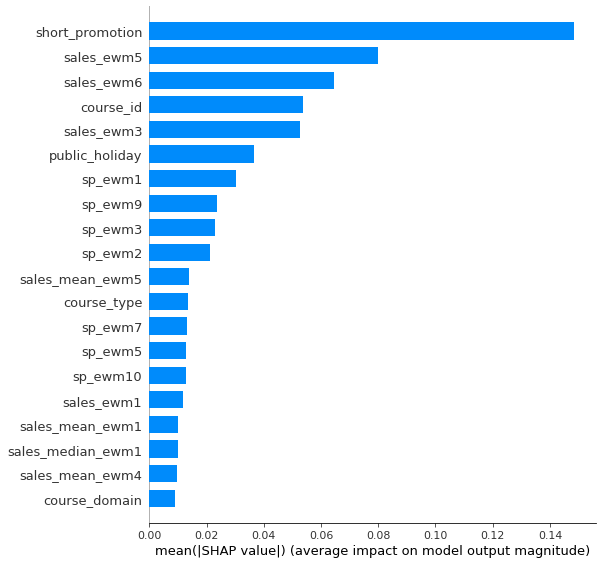

In [670]:
shap.summary_plot(shap_values[:,:-1], features=X_train,plot_type='bar')

In [0]:
train_prediction = fit_model.predict(X_train)

In [672]:
rmsle(np.expm1(y_train),np.expm1(train_prediction))*1000

119.89630338643872

In [673]:
X_test.head()

,competition_metric,course_domain,course_id,course_type,long_promotion,public_holiday,sales_lag,short_promotion,user_traffic_lag,course_domain_type_sales_mean,course_domain_type_sales_median,course_domain_type_traffic_mean,course_domain_type_traffic_median,user_traffic_ewm1,user_traffic_ewm2,user_traffic_ewm3,user_traffic_ewm4,user_traffic_ewm5,user_traffic_ewm6,sales_ewm1,sales_ewm2,sales_ewm3,sales_ewm4,sales_ewm5,sales_ewm6,sp_ewm1,sp_ewm2,sp_ewm3,sp_ewm4,sp_ewm5,sp_ewm6,sp_ewm7,sp_ewm8,sp_ewm9,sp_ewm10,sales_mean_ewm1,sales_mean_ewm2,sales_mean_ewm3,sales_mean_ewm4,sales_mean_ewm5,sales_mean_ewm6,sales_median_ewm1,sales_median_ewm2,sales_median_ewm3,sales_median_ewm4,sales_median_ewm5,sales_median_ewm6,traffic_mean_ewm1,traffic_mean_ewm2,traffic_mean_ewm3,traffic_mean_ewm4,traffic_mean_ewm5,traffic_mean_ewm6,traffic_median_ewm1,traffic_median_ewm2,traffic_median_ewm3,traffic_median_ewm4,traffic_median_ewm5,traffic_median_ewm6
615,0.007,Development,1,Course,1,0,76.0,1,11844.0,102.512987,94.0,15567.545455,13828.5,11859.156372,12274.5,11966.722456,11844.0,12067.276244,11833.5,83.511216,85.0,85.173224,80.5,85.352898,85.0,0.674405,0.5,0.484365,0.400000,0.462936,0.500,0.450313,0.42,0.441781,0.416667,111.002068,117.373377,110.481459,103.100649,110.611218,107.857143,100.418071,105.75,100.295345,94.50,100.551975,99.25,15473.466033,16192.431818,15305.048891,15299.931818,15269.196570,15523.227273,14070.903394,14747.25,14027.281680,14054.25,14016.103492,14280.00
616,0.007,Development,1,Course,1,0,89.0,0,12369.0,96.207792,88.0,14647.636364,13366.5,11951.855213,12390.0,11992.675846,11991.0,12077.168826,11844.0,84.509177,87.5,85.420112,83.0,85.472475,86.0,0.551786,0.5,0.453116,0.366667,0.440354,0.475,0.432653,0.40,0.427296,0.416667,108.312200,117.373377,109.560577,100.870130,110.138975,107.857143,98.160240,105.75,99.502097,91.75,100.140435,99.25,15323.315184,16192.431818,15262.635180,15225.545455,15248.817547,15523.227273,13942.830049,14747.25,13984.650604,13844.25,13994.805017,14280.00
617,0.007,Development,1,Course,1,0,87.0,0,13566.0,93.071429,85.0,14135.181818,12967.5,12245.336084,12873.0,12094.180630,12222.0,12125.982963,11865.0,84.962054,88.0,85.522041,85.0,85.522558,86.5,0.451461,0.5,0.423883,0.333333,0.418873,0.450,0.415687,0.40,0.413286,0.416667,105.541150,117.373377,108.496761,97.717532,109.579383,107.857143,95.767469,105.75,98.566477,88.75,99.644028,99.25,15107.290936,16192.431818,15189.896253,14877.409091,15212.304900,15523.227273,13765.497313,14747.25,13919.027984,13671.00,13961.122885,14280.00
618,0.007,Development,1,Course,1,0,74.0,1,10017.0,93.350649,86.0,14161.363636,12894.0,11840.184069,12390.0,11960.168977,12222.0,12056.835980,11865.0,82.968953,86.5,84.778683,85.0,85.144769,86.5,0.551196,0.6,0.461052,0.366667,0.447221,0.450,0.438601,0.42,0.432523,0.433333,103.324696,108.250000,107.519593,97.717532,109.047293,107.857143,93.991566,98.50,97.755737,88.75,99.196682,99.25,14935.304154,15746.250000,15123.539310,14877.409091,15177.847809,15523.227273,13607.043256,14211.75,13852.897147,13644.75,13926.135249,14280.00
619,0.007,Development,1,Course,1,0,59.0,1,9135.0,93.071429,83.5,13879.500000,12705.0,11348.332420,12253.5,11777.900010,11991.0,11961.038079,11844.0,78.610962,85.0,83.115542,83.0,84.287563,86.0,0.632796,0.7,0.495822,0.400000,0.474186,0.450,0.460616,0.44,0.451129,0.450000,101.460465,99.360390,106.587453,97.717532,108.523495,105.766234,92.084008,91.00,96.836012,88.75,98.682037,96.75,14743.339762,15107.590909,15043.278710,14877.409091,15135.279028,15428.522727,13443.035391,13597.50,13778.839266,13644.75,13886.098028,14253.75


In [0]:
test_prediction = fit_model.predict(X_test)

In [675]:
rmsle(np.expm1(y_test),np.expm1(test_prediction))*1000

283.7091909543352

In [676]:
test_prediction.min()

1.2334556959079892

In [677]:
np.expm1(test_prediction.min())

2.433072716627665

In [678]:
test.head()

,competition_metric,course_domain,course_id,course_type,day_no,id,long_promotion,public_holiday,sales,sales_lag,short_promotion,user_traffic,user_traffic_lag,course_domain_type_sales_mean,course_domain_type_sales_median,course_domain_type_traffic_mean,course_domain_type_traffic_median,user_traffic_ewm1,user_traffic_ewm2,user_traffic_ewm3,user_traffic_ewm4,user_traffic_ewm5,user_traffic_ewm6,sales_ewm1,sales_ewm2,sales_ewm3,sales_ewm4,sales_ewm5,sales_ewm6,sp_ewm1,sp_ewm2,sp_ewm3,sp_ewm4,sp_ewm5,sp_ewm6,sp_ewm7,sp_ewm8,sp_ewm9,sp_ewm10,sales_mean_ewm1,sales_mean_ewm2,sales_mean_ewm3,sales_mean_ewm4,sales_mean_ewm5,sales_mean_ewm6,sales_median_ewm1,sales_median_ewm2,sales_median_ewm3,sales_median_ewm4,sales_median_ewm5,sales_median_ewm6,traffic_mean_ewm1,traffic_mean_ewm2,traffic_mean_ewm3,traffic_mean_ewm4,traffic_mean_ewm5,traffic_mean_ewm6,traffic_median_ewm1,traffic_median_ewm2,traffic_median_ewm3,traffic_median_ewm4,traffic_median_ewm5,traffic_median_ewm6
822,0.007,Development,1,Course,883,883,1,0,NaN,62.0,1,NaN,8820.0,98.107527,86.0,12804.354839,11329.5,12384.831278,11602.5,11991.802125,11172.0,11821.617015,11487.0,99.643537,81.5,91.977528,82.0,89.024666,83.5,0.405533,0.2,0.369902,0.400000,0.375210,0.425,0.378837,0.42,0.381258,0.366667,127.295072,99.400538,116.976014,100.456989,113.311778,102.255376,116.223744,89.50,107.217068,91.25,103.938687,93.75,15747.733690,13727.338710,15124.478529,14490.225806,14878.587540,14491.919355,14262.077433,12579.00,13697.386447,13098.75,13484.412842,13130.25
823,0.007,Development,1,Course,884,884,1,0,NaN,80.0,1,NaN,10626.0,115.419355,101.5,15211.451613,13062.0,12065.043773,10416.0,11903.685858,11077.5,11782.416457,11298.0,96.071985,75.0,91.204784,80.0,88.728775,83.0,0.513618,0.3,0.410554,0.400000,0.405687,0.450,0.403196,0.42,0.401545,0.383333,125.135851,108.056452,116.875584,100.456989,113.380879,102.255376,113.546700,96.50,106.848225,91.25,103.858730,93.75,15650.227857,14580.153226,15130.089695,14490.225806,14889.501116,14491.919355,14043.881536,12925.50,13656.393773,12925.50,13470.563241,13051.50
824,0.007,Development,1,Course,885,885,1,0,NaN,82.0,1,NaN,11193.0,117.295699,102.0,14939.806452,13293.0,11906.490359,10909.5,11857.835158,11077.5,11763.091327,11182.5,93.513442,81.0,90.610927,80.0,88.508159,82.5,0.602051,0.4,0.448582,0.400000,0.434678,0.475,0.426600,0.42,0.421166,0.400000,123.710369,116.357527,116.902689,100.456989,113.509234,102.255376,111.447300,101.75,106.535436,91.25,103.797788,93.75,15521.060329,15075.629032,15117.813357,14490.225806,14891.150471,14491.919355,13907.357620,13177.50,13632.949014,12925.50,13464.741495,13051.50
825,0.007,Development,1,Course,886,886,1,0,NaN,15.0,1,NaN,2562.0,23.139785,20.0,3507.903226,3087.0,10207.492112,10909.5,11258.103857,11077.5,11461.416202,11172.0,79.238271,81.0,85.732803,80.0,86.098056,81.0,0.674405,0.5,0.484158,0.400000,0.462255,0.500,0.449086,0.42,0.440144,0.416667,105.424808,116.357527,110.853469,100.456989,110.546301,100.456989,94.820518,101.75,100.952505,91.25,101.050319,91.25,13336.849947,15075.629032,14368.786897,14490.225806,14517.929250,14215.532258,11940.019871,13177.50,12952.565206,12925.50,13124.487676,13030.50
826,0.007,Development,1,Course,887,887,1,0,NaN,82.0,0,NaN,12222.0,120.494624,111.5,17027.951613,14941.5,10573.766274,11707.5,11320.290705,11077.5,11486.353375,11172.0,79.740403,82.0,85.491977,80.0,85.963693,81.0,0.551786,0.5,0.452922,0.366667,0.439706,0.475,0.431475,0.40,0.425713,0.416667,108.164774,118.895161,111.475479,100.456989,110.872476,100.456989,97.853151,106.75,101.632988,91.25,101.392932,91.25,14007.959341,16119.701613,14540.345911,14490.225806,14600.225065,14215.532258,12485.743531,14117.25,13080.883580,12925.50,13184.061850,13030.50


In [0]:
__ = Pool(X,label=y,cat_features=cat_features)

In [683]:
model = CatBoostRegressor(cat_features=cat_features,od_type="Iter",
          early_stopping_rounds=150,learning_rate=0.13994)
fit_model = model.fit(__,use_best_model=True,verbose=100)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.4239115	total: 482ms	remaining: 8m 1s
100:	learn: 0.1838763	total: 43.1s	remaining: 6m 23s
200:	learn: 0.1613577	total: 1m 26s	remaining: 5m 44s
300:	learn: 0.1504902	total: 2m 10s	remaining: 5m 3s
400:	learn: 0.1430623	total: 2m 54s	remaining: 4m 20s
500:	learn: 0.1382038	total: 3m 37s	remaining: 3m 36s
600:	learn: 0.1346267	total: 4m 21s	remaining: 2m 53s
700:	learn: 0.1314080	total: 5m 4s	remaining: 2m 9s
800:	learn: 0.1290088	total: 5m 47s	remaining: 1m 26s
900:	learn: 0.1272329	total: 6m 31s	remaining: 43s
999:	learn: 0.1253695	total: 7m 14s	remaining: 0us


In [0]:
final_predictions = fit_model.predict(test.drop(['day_no', 'id','sales','user_traffic',],axis=1))

In [685]:
final_predictions.min()

3.245548139900652

In [0]:
final_predictions = np.expm1(final_predictions)

In [0]:
test['Sales'] = final_predictions

In [0]:
test['ID'] = test['id'] 

In [0]:
test[['ID','Sales']].to_csv('av_bain16.csv',index=False)